In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
dpath = '/home/cglab/projects/abcd/data/abcd5.1-rser/'

### Difficulty with Emotion Regulation (DERS) - Parent completed

In [3]:
ders = pd.read_csv(dpath + 'mh_p_ders.csv')
se_nms = ders.columns[:2]
ders.head()

,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,...,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,5,5,1,4,5,5,0,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,2,2,1,5,5,5,1,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,4,4,2,4,5,4,0,3,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,5,5,2,5,4,4,0,4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,2,2,2,2,2,2,0,2,...,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0


In [4]:
ders.shape

(14708, 32)

In [5]:
ders[['src_subject_id', 'eventname']].nunique()

src_subject_id    10146
eventname             2
dtype: int64

In [6]:
ders[['eventname']].value_counts()

eventname               
3_year_follow_up_y_arm_1    10042
4_year_follow_up_y_arm_1     4666
Name: count, dtype: int64

* DERs measure first collected year 3

#### Convert refuse to answer flag (777) to nan

In [7]:
ders[ders==777] = np.nan

### OLD Unused - Remove participants with unanswered items (777)
777 was coded for any item parents chose not to respond to

In [8]:
# ogn = ders.shape[0]

In [9]:
# # select rows that don't have 777 in any column
# ders = ders[(ders != 777).all(1)]
# print("Number & Percent of particpants excluded: {0}, {1}% of sample".format(ogn-ders.shape[0], round((1-ders.shape[0]/ogn)*100, 2)))

In [10]:
# ders.describe()

### columns with question items

In [11]:
 # removing sub and event name and select_language
cols_ignore = se_nms.tolist()
cols_ignore.append('ders_p_select_language___1')
ders_ts_cols = list(set(ders.columns).difference(cols_ignore))
print(len(ders_ts_cols))
ders_ts_cols

29


['ders_upset_control_p',
 'ders_upset_depressed_p',
 'ders_upset_emotion_overwhelm_p',
 'ders_upset_esteem_p',
 'ders_upset_behavior_control_p',
 'ders_feelings_attentive_p',
 'ders_upset_irritation_p',
 'ders_clear_feelings_p',
 'ders_upset_difficulty_p',
 'ders_upset_fixation_p',
 'ders_feelings_know_p',
 'ders_upset_out_control_p',
 'ders_upset_concentrate_p',
 'ders_upset_embarrassed_p',
 'ders_feelings_care_p',
 'ders_upset_weak_p',
 'ders_upset_behavior_p',
 'ders_upset_ack_p',
 'ders_attn_awareness_p',
 'ders_upset_better_p',
 'ders_upset_guilty_p',
 'ders_emotion_overwhelm_p',
 'ders_upset_angry_p',
 'ders_upset_lose_control_p',
 'ders_upset_long_time_better_p',
 'ders_upset_feel_better_p',
 'ders_upset_ashamed_p',
 'ders_upset_time_p',
 'ders_upset_focus_p']

### DERS full scale questions
* abcd DERS only has 29 qeustions, so need to compare with main 36 item DERS to see which questions are present
* in order to compute total and subscale scores
* 

In [12]:
fders = pd.read_excel('ders_questions_ordered.xlsx')
fders.dropna(inplace=True)
print(fders.shape)
fders.reset_index(inplace=True, drop=True)
fders.to_csv('ders_questions_ordered_cl.csv', index=False)
fders

(36, 1)


,Question
0,I am clear about my feelings.
1,I pay attention to how I feel.
2,I experience my emotions as overwhelming and o...
3,I have no idea how I am feeling.
4,I have difficulty making sense out of my feeli...
5,I am attentive to my feelings.
6,I know exactly how I am feeling.
7,I care about what I am feeling.
8,I am confused about how I feel.
9,"When I’m upset, I acknowledge my emotions."


### ABCD DERS measure

In [13]:
aders = pd.read_excel('ders_questions_abcd.xlsx')
aders.head()

,Table,Variable,Question,FullDersQuestionNum,Options,Category
0,mh_p_ders,ders_attn_awareness_p,My child pays attention to how he/she feels,2,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
1,mh_p_ders,ders_clear_feelings_p,My child is clear about his/her feelings,1,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
2,mh_p_ders,ders_emotion_overwhelm_p,My child experiences his/her emotions as overw...,3,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
3,mh_p_ders,ders_feelings_attentive_p,My child is attentive to his/her feelings.,6,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
4,mh_p_ders,ders_feelings_care_p,My child cares about what he/she is feeling.,8,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01


### Fuzzy Matching attempt

In [14]:
from fuzzywuzzy import process

threshold = 50

list1 = fders['Question']
list2 = aders['Question']


response = []
for name_to_find in list1:
    resp_match =  process.extractOne(name_to_find ,list2)
    if resp_match[1] > threshold:
         row = {'full_ders_item':name_to_find,'abcd_ders_name':resp_match[0], 'score':resp_match[1]}
         response.append(row)
         # print(row)

results = pd.DataFrame(response)

# If you need all the 'actual_name' tp be in the datframe, continue below
# Otherwise don't include these last 2 lines of code
unmatched = pd.DataFrame([x for x in list2 if x not in list(results['abcd_ders_name'])], columns=['abcd_ders_name'])
results = pd.concat([results, unmatched], sort=False).reset_index(drop=True)
results

/home/cglab/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,full_ders_item,abcd_ders_name,score
0,I am clear about my feelings.,My child pays attention to how he/she feels,86.0
1,I pay attention to how I feel.,My child knows exactly how he/she is feeling.,86.0
2,I experience my emotions as overwhelming and o...,My child experiences his/her emotions as overw...,87.0
3,I have no idea how I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
4,I have difficulty making sense out of my feeli...,"When my child is upset, he/she becomes angry w...",86.0
5,I am attentive to my feelings.,My child experiences his/her emotions as overw...,86.0
6,I know exactly how I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
7,I care about what I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
8,I am confused about how I feel.,"When my child is upset, he/she knows that he/s...",86.0
9,"When I’m upset, I acknowledge my emotions.",My child experiences his/her emotions as overw...,86.0


In [15]:
set(fders).intersection(ders)

set()

* Set comparison and Fuzzywuzzy matching didn't work, due to the length and similarity across items
* so I manually matched them in excel
* Load the match index below

### Items excluded from ABCD DERS questionnaire

In [16]:
aders = pd.read_excel('ders_questions_abcd.xlsx')
# quesitons not present in the ABCD DERS questionnaire
ders_items_excluded = set(np.arange(36)+1).difference(aders['FullDersQuestionNum'])
ders_items_excluded

{4, 5, 9, 17, 20, 31, 34}

## Setup to Score DERS

In [17]:
# items to revesrse score
q_rev_score = [1, 2, 6, 7, 8, 10, 17, 20, 22, 24, 34]
# Subscaling Scoring 


# items to combine for each subscale
# ## Original
# nonaccept = [11, 12, 21, 23, 25, 29]
# goals = [13, 18, 20, 26, 33]
# impulse = [3, 14, 19, 24, 27, 32]
# awareness = [2, 6, 8, 10, 17, 34]
# strategies = [15, 16, 22, 38, 20, 31, 35, 36]
# clarity = [1, 4, 5, 7, 9]

# New 5 factor from Smith et al 2024 5-factor model, dropping strategies
nonaccept = [11, 12, 21, 23, 25, 29]
goals = [13, 18, 26]#, 20
impulse = [14, 19, 27, 32]
awareness = [2, 6, 8, 10]#, 17, 34
strategies = [15, 16, 22, 38, 20, 31, 35, 36]
# clarity = [4, 5, 9]
aware_clar = awareness + [1, 7, 22]

# get variable names for subscales
nonaccept_nm = aders[aders['FullDersQuestionNum'].isin(nonaccept)]['Variable'].tolist()
goals_nm = aders[aders['FullDersQuestionNum'].isin(goals)]['Variable'].tolist()
impulse_nm = aders[aders['FullDersQuestionNum'].isin(impulse)]['Variable'].tolist()
awareness_nm = aders[aders['FullDersQuestionNum'].isin(awareness)]['Variable'].tolist()
# strategies_nm = aders[aders['FullDersQuestionNum'].isin(strategies)]['Variable'].tolist()
# clarity_nm = aders[aders['FullDersQuestionNum'].isin(clarity)]['Variable'].tolist()
aware_identify_nm = aders[aders['FullDersQuestionNum'].isin(aware_clar)]['Variable'].tolist()

# obtain variables that need Reverse Score
qnm_rev_score = aders[aders['FullDersQuestionNum'].isin(q_rev_score)]['Variable'].tolist()

In [18]:
qnm_rev_score

['ders_attn_awareness_p',
 'ders_clear_feelings_p',
 'ders_feelings_attentive_p',
 'ders_feelings_care_p',
 'ders_feelings_know_p',
 'ders_upset_ack_p',
 'ders_upset_behavior_control_p',
 'ders_upset_better_p']

In [19]:
goals_nm

['ders_upset_concentrate_p', 'ders_upset_difficulty_p', 'ders_upset_focus_p']

In [20]:
aware_identify_nm

['ders_attn_awareness_p',
 'ders_clear_feelings_p',
 'ders_feelings_attentive_p',
 'ders_feelings_care_p',
 'ders_feelings_know_p',
 'ders_upset_ack_p',
 'ders_upset_better_p']

In [21]:
dersi = nonaccept_nm + goals_nm + impulse_nm + aware_identify_nm
print(len(dersi))
dersi

20


['ders_upset_angry_p',
 'ders_upset_ashamed_p',
 'ders_upset_embarrassed_p',
 'ders_upset_guilty_p',
 'ders_upset_irritation_p',
 'ders_upset_weak_p',
 'ders_upset_concentrate_p',
 'ders_upset_difficulty_p',
 'ders_upset_focus_p',
 'ders_upset_behavior_p',
 'ders_upset_control_p',
 'ders_upset_lose_control_p',
 'ders_upset_out_control_p',
 'ders_attn_awareness_p',
 'ders_clear_feelings_p',
 'ders_feelings_attentive_p',
 'ders_feelings_care_p',
 'ders_feelings_know_p',
 'ders_upset_ack_p',
 'ders_upset_better_p']

### see how many subs didn't answer at least half of the questions 

In [25]:

ders[ders[dersi].isnull().sum(axis=1)>10].shape

(50, 32)

### Select subs with at least 10 out of 20 item 
* drop subs from overall ders df
* who didn't answer at least half DERS items

In [26]:
ders = ders[ders[dersi].isnull().sum(axis=1)<10]
print(ders.shape)

(14646, 32)


In [30]:
ders3.shape

(10042, 32)

In [22]:
# get 3 year ders, which is used in final model
ders3 = ders[ders['eventname']=='3_year_follow_up_y_arm_1']
# ders3[dersi].isnull().all(axis=1) - boolean, true if sub didn't answer ALL of the DERS questions
ders3[ders3[dersi].isnull().all(axis=1)]

,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,...,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p
472,NDAR_INV0Y2153YG,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627,NDAR_INV3CJ9GXRL,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,NDAR_INV4EKBZJTW,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3943,NDAR_INV8E73MX03,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6077,NDAR_INVD4J6E7PK,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6865,NDAR_INVEVN2CFJL,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7355,NDAR_INVFVXF1HTH,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7373,NDAR_INVFX83EZC7,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8443,NDAR_INVJ97MXFZ1,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,NDAR_INVJZJK5N4L,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ders3[dersi].isnull().sum(axis=1)

0        0
1        0
2        0
4        0
6        0
        ..
14697    1
14699    0
14701    0
14703    0
14706    0
Length: 10042, dtype: int64

In [24]:
ders3[ders3[dersi].isnull().sum(axis=1)>10].shape

(30, 32)

### Load Subid and Threatf

In [27]:
spath = '/home/cglab/projects/abcd/sesher/'
aux = pd.read_csv(spath + 'ders_impute_aux_vars.csv')
aux.shape

(9881, 5)

In [ ]:
df = aux.merge(ders, how='left', on='subID')
df.shape

### Impute missing item responses
* Get item cols for imputing
* using iterative imputer like MICE

In [ ]:
dfi = df[dersi]

# Split data by gender
df_male = dfi[dfi['gender1'] == 1]
df_female = dfi[dfi['gender1'] == 2]

# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=123)

# Perform imputation separately for males
imputed_data_male = imputer.fit_transform(df_male)
imputed_df_male = pd.DataFrame(imputed_data_male, columns=df.columns)

# Perform imputation separately for females
imputed_data_female = imputer.fit_transform(df_female)
imputed_df_female = pd.DataFrame(imputed_data_female, columns=df.columns)

# Combine the imputed data
imputed_df = pd.concat([imputed_df_male, imputed_df_female]).sort_index().reset_index(drop=True)

print(imputed_df)

In [ ]:
# initiate imputer object
imp = IterativeImputer(random_state=0)
# impute and return transfromed array
dfi_imp = imp.fit_transform(dfi)
# round to integer, to match response options
dfi_imp = np.round(dfi_imp, 0)

# convert to dataframe for ease of processing
dfimp = pd.DataFrame(dfi_imp, columns=dfi.columns)
dfimp['ID'] = df['ID'].tolist()
dfimp.head()

In [ ]:
# export to csv
dfimp.to_csv(outpath + 'dorry_w1_SSS_matched_CWT.csv', index=False)

### Reverse Score
* 8 items included that need reverse scoring

In [21]:
# check if already reversed scored (i.e., any negative numbers)
if ~(ders[qnm_rev_score] < 0).values.any():
    ders[qnm_rev_score] = ders[qnm_rev_score] * -1

In [22]:
# sum across total score columns
ders['ders_total_score'] = ders[ders_ts_cols].sum(axis=1)
ders['ders_impulse_score'] = ders[impulse_nm].sum(axis=1)
ders['ders_nonaccept_score'] = ders[nonaccept_nm].sum(axis=1)
ders['ders_goals_score'] = ders[goals_nm].sum(axis=1)
ders['ders_awareness_score'] = ders[awareness_nm].sum(axis=1)
# ders['ders_strategies_score'] = ders[strategies_nm].sum(axis=1)
# ders['ders_clarity_score'] = ders[clarity_nm].sum(axis=1)
ders['ders_aware_clar_score'] = ders[aware_identify_nm].sum(axis=1)
print(ders.shape)
ders.head()

(14708, 38)


,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,...,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-5.0,-5.0,1.0,-4.0,-5.0,-5.0,0,-5.0,...,1.0,1.0,1.0,1.0,-18.0,4.0,6.0,3.0,-19.0,-34.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,-2.0,-2.0,1.0,-5.0,-5.0,-5.0,1,-5.0,...,1.0,1.0,1.0,1.0,4.0,4.0,13.0,5.0,-17.0,-25.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-4.0,-4.0,2.0,-4.0,-5.0,-4.0,0,-3.0,...,1.0,2.0,1.0,1.0,-1.0,7.0,6.0,5.0,-16.0,-28.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-5.0,-5.0,2.0,-5.0,-4.0,-4.0,0,-4.0,...,1.0,1.0,1.0,1.0,-13.0,4.0,6.0,5.0,-18.0,-32.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,-2.0,-2.0,2.0,-2.0,-2.0,-2.0,0,-2.0,...,2.0,2.0,3.0,1.0,24.0,10.0,6.0,9.0,-8.0,-14.0


In [24]:
ders[ders['ders_goals_score']<3].dropna(subset=['ders_goals_score']).shape

(66, 38)

In [20]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,...,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score
count,14642.000000,14650.000000,14633.000000,14618.000000,14637.000000,14642.000000,14708.000000,14644.000000,14604.000000,14584.000000,...,14637.000000,14612.000000,14602.000000,14505.000000,14708.000000,14708.000000,14708.000000,14708.000000,14708.000000,14708.000000
mean,-3.845991,-3.835358,1.795804,-3.556027,-3.892738,-3.723672,0.053848,-3.660202,1.791153,1.472024,...,1.517251,1.520257,1.476236,1.409859,6.798749,6.209478,9.426843,7.074789,-14.881221,-25.843487
std,1.065498,1.082724,1.040653,1.171151,1.064971,1.072789,0.225726,1.162222,1.055309,0.802374,...,0.891293,0.903192,0.866954,0.770759,17.334741,3.319991,4.189584,3.326152,3.910934,6.305075
min,-5.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-29.000000,0.000000,0.000000,0.000000,-20.000000,-35.000000
25%,-5.000000,-5.000000,1.000000,-4.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-6.000000,4.000000,6.000000,5.000000,-18.000000,-31.000000
50%,-4.000000,-4.000000,1.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,8.000000,6.000000,-16.000000,-27.000000
75%,-3.000000,-3.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,16.000000,7.000000,11.000000,9.000000,-12.000000,-22.000000
max,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,90.000000,20.000000,30.000000,15.000000,0.000000,0.000000


<Axes: ylabel='Frequency'>

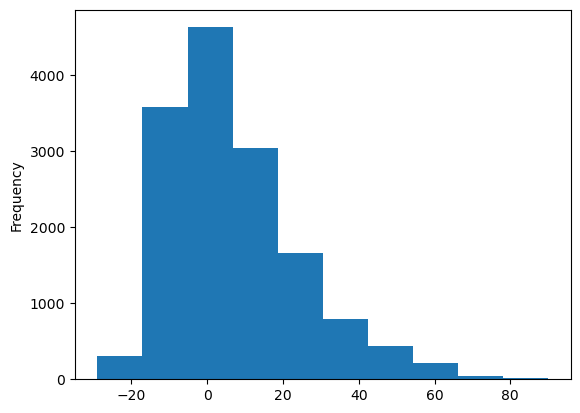

In [21]:
ders['ders_total_score'].plot.hist()

<Axes: ylabel='Frequency'>

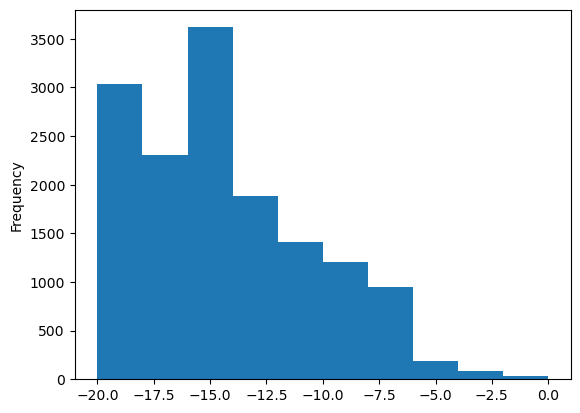

In [22]:
ders['ders_awareness_score'].plot.hist()

<Axes: ylabel='Frequency'>

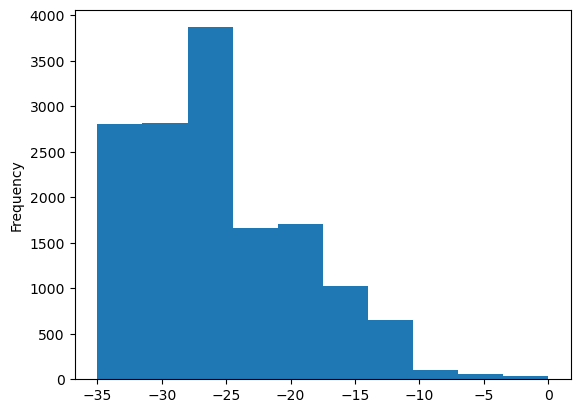

In [23]:
ders['ders_aware_clar_score'].plot.hist()

In [24]:
 # & (ders['ders_clear_feelings_p']<777)
# ders = ders[(ders['ders_total_score']<200)]
# ders.shape

In [25]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,...,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score
count,14642.000000,14650.000000,14633.000000,14618.000000,14637.000000,14642.000000,14708.000000,14644.000000,14604.000000,14584.000000,...,14637.000000,14612.000000,14602.000000,14505.000000,14708.000000,14708.000000,14708.000000,14708.000000,14708.000000,14708.000000
mean,-3.845991,-3.835358,1.795804,-3.556027,-3.892738,-3.723672,0.053848,-3.660202,1.791153,1.472024,...,1.517251,1.520257,1.476236,1.409859,6.798749,6.209478,9.426843,7.074789,-14.881221,-25.843487
std,1.065498,1.082724,1.040653,1.171151,1.064971,1.072789,0.225726,1.162222,1.055309,0.802374,...,0.891293,0.903192,0.866954,0.770759,17.334741,3.319991,4.189584,3.326152,3.910934,6.305075
min,-5.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-29.000000,0.000000,0.000000,0.000000,-20.000000,-35.000000
25%,-5.000000,-5.000000,1.000000,-4.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-6.000000,4.000000,6.000000,5.000000,-18.000000,-31.000000
50%,-4.000000,-4.000000,1.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,8.000000,6.000000,-16.000000,-27.000000
75%,-3.000000,-3.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,16.000000,7.000000,11.000000,9.000000,-12.000000,-22.000000
max,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,90.000000,20.000000,30.000000,15.000000,0.000000,0.000000


In [26]:
ders.columns

Index(['src_subject_id', 'eventname', 'ders_attn_awareness_p',
       'ders_clear_feelings_p', 'ders_emotion_overwhelm_p',
       'ders_feelings_attentive_p', 'ders_feelings_care_p',
       'ders_feelings_know_p', 'ders_p_select_language___1',
       'ders_upset_ack_p', 'ders_upset_angry_p', 'ders_upset_ashamed_p',
       'ders_upset_behavior_control_p', 'ders_upset_behavior_p',
       'ders_upset_better_p', 'ders_upset_concentrate_p',
       'ders_upset_control_p', 'ders_upset_depressed_p',
       'ders_upset_difficulty_p', 'ders_upset_embarrassed_p',
       'ders_upset_emotion_overwhelm_p', 'ders_upset_esteem_p',
       'ders_upset_feel_better_p', 'ders_upset_fixation_p',
       'ders_upset_focus_p', 'ders_upset_guilty_p', 'ders_upset_irritation_p',
       'ders_upset_long_time_better_p', 'ders_upset_lose_control_p',
       'ders_upset_out_control_p', 'ders_upset_time_p', 'ders_upset_weak_p',
       'ders_total_score', 'ders_impulse_score', 'ders_nonaccept_score',
       'ders_goals_

In [27]:
print(ders.shape)
ders.eventname.value_counts()

(14708, 38)


eventname
3_year_follow_up_y_arm_1    10042
4_year_follow_up_y_arm_1     4666
Name: count, dtype: int64

### Save DERS items responses and scores for all

In [28]:
ders.to_csv(dpath + 'abcd5.1_ders_item_scores_all.csv', index=False)

In [29]:
cols2out = se_nms.tolist()
cols2out += [c for c in ders.columns if 'score' in c]
ders_sh = ders[cols2out]
ders_sh.to_csv(dpath + 'abcd5.1_ders_scores.csv', index=False)

In [30]:
cols2out

['src_subject_id',
 'eventname',
 'ders_total_score',
 'ders_impulse_score',
 'ders_nonaccept_score',
 'ders_goals_score',
 'ders_awareness_score',
 'ders_aware_clar_score']

In [31]:
print(ders_sh.shape)
ders_sh.head()

(14708, 8)


,src_subject_id,eventname,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-18.0,4.0,6.0,3.0,-19.0,-34.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,4.0,4.0,13.0,5.0,-17.0,-25.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-1.0,7.0,6.0,5.0,-16.0,-28.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-13.0,4.0,6.0,5.0,-18.0,-32.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,24.0,10.0,6.0,9.0,-8.0,-14.0


### Set up for Lavaan equations in R

### Awareness Subscale

In [32]:
' + '.join(aware_identify_nm)

'ders_attn_awareness_p + ders_clear_feelings_p + ders_feelings_attentive_p + ders_feelings_care_p + ders_feelings_know_p + ders_upset_ack_p + ders_upset_better_p'

### Nonaccept Subscale

In [33]:
' + '.join(nonaccept_nm)

'ders_upset_angry_p + ders_upset_ashamed_p + ders_upset_embarrassed_p + ders_upset_guilty_p + ders_upset_irritation_p + ders_upset_weak_p'

### Impulse Subscale

In [34]:
' + '.join(impulse_nm)

'ders_upset_behavior_p + ders_upset_control_p + ders_upset_lose_control_p + ders_upset_out_control_p'

### Goals Subscale

In [35]:
' + '.join(goals_nm)

'ders_upset_concentrate_p + ders_upset_difficulty_p + ders_upset_focus_p'

### THESE ITEMS NOT FOUND IN ABCD: Clarity Subscale

In [36]:
# ' + '.join(clarity_nm)

# Emotional Regulation Questionnaire - Youth completed

In [37]:
erq = pd.read_csv(dpath + "mh_y_erq.csv")
erq.head()

,src_subject_id,eventname,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_ss_reappraisal_pr,erq_ss_suppress_pr
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,1.0,2,2,2,2,2,3,NaN,NaN
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,1.0,2,4,4,3,3,3,NaN,NaN
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,1.0,2,3,1,3,3,4,NaN,NaN
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2.0,3,2,4,3,3,2,NaN,NaN
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,1.0,3,4,3,4,2,4,NaN,NaN


In [38]:
erq.shape

(15032, 11)

In [39]:
erq[['src_subject_id', 'eventname']].nunique()

src_subject_id    10364
eventname             2
dtype: int64

In [40]:
erq[['eventname']].value_counts()

eventname               
3_year_follow_up_y_arm_1    10299
4_year_follow_up_y_arm_1     4733
Name: count, dtype: int64

In [41]:
erq['erq_ss_reappraisal_pr'].value_counts()

Series([], Name: count, dtype: int64)

ERQ first collected year 3

variable 'erq_ss_reappraisal_pr' is completely empty so we'll create from item responses

In [42]:
erq.columns

Index(['src_subject_id', 'eventname', 'erq_admin', 'erq_feelings_control',
       'erq_feelings_happy', 'erq_feelings_hide', 'erq_feelings_less_bad',
       'erq_feelings_self', 'erq_feelings_think', 'erq_ss_reappraisal_pr',
       'erq_ss_suppress_pr'],
      dtype='object')

In [43]:
reappraisal_cols = ['erq_feelings_happy', 'erq_feelings_less_bad', 'erq_feelings_think']
suppression_cols = ['erq_feelings_control', 'erq_feelings_hide', 'erq_feelings_self']

In [44]:
erq['erq_ss_reappraisal_pr'].isnull().sum()

15032

### Create ERQ scale and subscale scores
* average and prorate scores

In [45]:
erq.describe()

,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_ss_reappraisal_pr,erq_ss_suppress_pr
count,13431.000000,15032.000000,15032.000000,15032.000000,15032.000000,15032.000000,15032.000000,0.0,0.0
mean,1.553868,6.648018,7.922898,6.650812,7.710351,5.781400,7.021621,NaN,NaN
std,0.663526,52.325348,59.363517,52.324403,58.364672,43.663053,52.297555,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,NaN,NaN
50%,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,NaN,NaN
75%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN,NaN
max,3.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,NaN,NaN


In [46]:
# set non-answer flag to nan for scoring
erq[erq==777] = np.nan
erq['erq_reapp'] = erq[reappraisal_cols].mean(axis=1)*3
erq['erq_supp'] = erq[suppression_cols].mean(axis=1)*3
erq.head()

,src_subject_id,eventname,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_ss_reappraisal_pr,erq_ss_suppress_pr,erq_reapp,erq_supp
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,1.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,7.0,6.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,1.0,2.0,4.0,4.0,3.0,3.0,3.0,NaN,NaN,10.0,9.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,1.0,2.0,3.0,1.0,3.0,3.0,4.0,NaN,NaN,10.0,6.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2.0,3.0,2.0,4.0,3.0,3.0,2.0,NaN,NaN,7.0,10.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,1.0,3.0,4.0,3.0,4.0,2.0,4.0,NaN,NaN,12.0,8.0


In [47]:
erq.drop(columns=['erq_ss_reappraisal_pr', 'erq_ss_suppress_pr'], inplace=True)
erq.describe()

,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_reapp,erq_supp
count,13431.000000,14963.000000,14943.000000,14963.000000,14946.000000,14984.000000,14963.000000,15002.000000,15009.000000
mean,1.553868,3.095636,3.342301,3.098443,3.283822,3.310865,3.470962,10.095121,9.505397
std,0.663526,1.086800,0.982927,1.049630,0.964545,1.008142,0.962335,2.320544,2.607932
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
25%,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,9.000000,8.000000
50%,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,10.000000,9.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,12.000000,11.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000,15.000000


### Save cleaned Emotion Regulation Questionnaire Scores

In [48]:
erq.to_csv(dpath + 'abcd5.1_erq_scores.csv', index=False)

In [42]:

erqc = erq[['src_subject_id', 'eventname', 'er_reappraisal', 'er_suppression']]
# erqc.to_csv(dpath + 'abcd5.0_emotion_regulation_scores.csv', index=False)

In [43]:
erqc.tail()

,src_subject_id,eventname,er_reappraisal,er_suppression
15027,NDAR_INVZZZ2ALR6,4_year_follow_up_y_arm_1,3.333333,2.333333
15028,NDAR_INVZZZNB0XC,3_year_follow_up_y_arm_1,3.666667,2.333333
15029,NDAR_INVZZZNB0XC,4_year_follow_up_y_arm_1,4.333333,3.000000
15030,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,3.333333,3.333333
15031,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,3.333333,3.666667


In [44]:
erqc.shape

(15032, 4)

In [45]:
erqc.describe()

,er_reappraisal,er_suppression
count,15032.000000,15032.000000
mean,7.551623,6.360076
std,46.277348,40.134670
min,1.000000,1.000000
25%,3.000000,2.666667
50%,3.333333,3.000000
75%,4.000000,3.666667
max,777.000000,777.000000


In [49]:
erqc.isnull().any()

src_subject_id    False
eventname         False
er_reappraisal    False
er_suppression    False
dtype: bool

* cleaned with no missing values - ready to be saved